In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import operator
import os
from pathlib import Path
cwd = os.getcwd() # get path of current working directory
main_folder = str(Path(cwd).parents[0]) # main folder is the lowest level in project

In [3]:
#all steps as in the figure1_table1-2.ipynb, thus use already derived file
cex84_02_div = pd.read_stata('cex84_02_div.dta')
cex84_02_div = cex84_02_div.drop(columns=['gambling', 'toiletry', 'housuppl'])
#cex84_02_div

In [4]:
#Aggregate some small expenses with similar expenses
cex84_02_div['foodout'] = cex84_02_div['foodout'] + cex84_02_div['foodwork'] 
cex84_02_div['renthome'] = cex84_02_div['renthome'] + cex84_02_div['rentothr']
cex84_02_div['pubs'] = cex84_02_div['pubs'] + cex84_02_div['books']
cex84_02_div['hospital'] = cex84_02_div['hospital'] + cex84_02_div['nurshome']
cex84_02_div['masstran'] = cex84_02_div['masstran'] + cex84_02_div['tolls']
cex84_02_div = cex84_02_div.drop(columns=['foodwork', 'rentothr', 'books', 'nurshome', 'tolls'])

cex84_02_div['single'] = 1
cex84_02_div.loc[cex84_02_div['wife_ed'] >=1, 'single'] = 0 
cex84_02_div['wifeH'] = 0
cex84_02_div.loc[cex84_02_div['wife_ed'] >=2, 'wifeH'] = 1 #/*spouse with some college, wife_ed with college ==3*/
cex84_02_div['sex'] = cex84_02_div['sex'] - 1
#cex84_02_div

In [5]:
cex84_02_div.to_stata("sampleUS")

In [6]:
cex84_02_div2 = cex84_02_div[cex84_02_div.single == 1]
cex84_02_div2
cex84_02_div2.to_stata("single")

cex84_02_div3 = cex84_02_div.loc[operator.and_(cex84_02_div['single'] == 0, cex84_02_div['wifeH'] == 0)]
cex84_02_div3
cex84_02_div3.to_stata("wifelessH")

cex84_02_div4 = cex84_02_div.loc[operator.and_(cex84_02_div['single'] == 0, cex84_02_div['wifeH'] == 1)]
cex84_02_div4
cex84_02_div4.to_stata("wifemoreH")

In [7]:
#shares
cex84_02_div4.rename(columns={'foodhome':'share1', 'foodout':'share2', 'tobacco':'share3', 'alcohol':'share4', 
                             'niteclub':'share5', 'clothes':'share6','tailors':'share7', 'jewelry':'share8', 
                             'hlthbeau':'share9', 'renthome':'share10', 'furnish':'share11', 'elect':'share12', 
                             'gas':'share13','water':'share14', 'homefuel':'share15','telephon':'share16', 
                             'servants':'share17', 'drugs':'share18', 'orthopd':'share19', 'doctors':'share20', 
                             'hospital':'share21', 'helthins':'share22', 'busiserv':'share23', 'lifeins':'share24',
                             'parts':'share25','carservs':'share26', 'gasoline':'share27', 'autoins':'share28', 
                             'masstran':'share29', 'othtrans':'share30', 'airfare':'share31', 'pubs':'share32', 
                             'recsport':'share33', 'othrec':'share34', 'highedu':'share35','lowedu':'share36', 
                             'othedu':'share37', 'charity':'share38'}, inplace=True)

C:\Users\gimat\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
cex84_02_div4 = cex84_02_div4[['share1', 'share2', 'share3', 'share4', 'share5', 'share6', 'share7', 'share8', 'share9',
                               'share10', 'share11', 'share12', 'share13', 'share14', 'share15', 'share16', 'share17', 
                               'share18', 'share19', 'share20', 'share21', 'share22', 'share23', 'share24', 'share25',
                               'share26', 'share27', 'share28', 'share29', 'share30', 'share31', 'share32', 'share33', 
                               'share34', 'share35', 'share36', 'share37', 'share38', 'ltotexp', 'age', 'ee', 'sex', 
                               'nchild', 'meanee']]
cex84_02_div4['id'] = np.arange(1, len(cex84_02_div4)+1)
cex84_02_div4 = cex84_02_div4.reset_index().drop(columns=['index'])
#cex84_02_div4

In [9]:
new_cex84_02_div4 = pd.wide_to_long(cex84_02_div4, ["share"], i='id', j="ind")
new_cex84_02_div4 = new_cex84_02_div4.sort_values(by=['id','ind'])
#new_cex84_02_div4

In [10]:
shares_cex84_02_div4 = new_cex84_02_div4.groupby('ind')['share', 'meanee'].mean()

<ipython-input-10-c85b2b94a882>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shares_cex84_02_div4 = new_cex84_02_div4.groupby('ind')['share', 'meanee'].mean()


In [11]:
shares_cex84_02_div4.to_stata("shares3A")

In [12]:
shares_reg = pd.read_stata('shares_reg1.dta')
shares_reg['id'] = np.arange(1, len(shares_reg)+1)
shares_reg_long = pd.wide_to_long(shares_reg,["bdum", "gdum", "sbdum", "sgdum"], i='id', j="ind")

shares = pd.read_stata('shares3A')

shares_joint = pd.merge(shares_reg_long, shares, on='ind')
shares_joint.rename(columns={'bdum':'incomebeta', 'gdum':'educbeta', 'share':'meansh'}, inplace=True)
shares_joint['sigmaincome'] = shares_joint['sbdum'] 
shares_joint['sigmaedu'] = shares_joint['sgdum'] 
#shares_joint

In [13]:
shares_joint['elastincome'] = (shares_joint['incomebeta']/shares_joint['meansh'])+1
shares_joint['elastedu'] = (shares_joint['educbeta']*shares_joint['meanee'])/shares_joint['meansh']

shares_joint = shares_joint[['ind', 'elastedu', 'elastincome', 'meansh']]
shares_joint.rename(columns={'elastedu':'elasteduH', 'elastincome':'elastincomeH', 'meansh':'meanshH'}, inplace=True)
#shares_joint

In [14]:
shares_joint.to_stata("elastH")

In [15]:
#single families
single = pd.read_stata('single')
single.rename(columns={'foodhome':'share1', 'foodout':'share2', 'tobacco':'share3', 'alcohol':'share4', 'niteclub':'share5', 'clothes':'share6','tailors':'share7', 'jewelry':'share8', 'hlthbeau':'share9', 'renthome':'share10', 'furnish':'share11', 'elect':'share12', 'gas':'share13','water':'share14', 'homefuel':'share15','telephon':'share16', 'servants':'share17', 'drugs':'share18', 'orthopd':'share19', 'doctors':'share20', 'hospital':'share21', 'helthins':'share22', 'busiserv':'share23', 'lifeins':'share24', 'parts':'share25','carservs':'share26', 'gasoline':'share27', 'autoins':'share28', 'masstran':'share29', 'othtrans':'share30', 'airfare':'share31', 'pubs':'share32', 'recsport':'share33', 'othrec':'share34', 'highedu':'share35','lowedu':'share36', 'othedu':'share37', 'charity':'share38'}, inplace=True)
#single

In [16]:
filter_col = [col for col in single if col.startswith('share')]

In [17]:
single = single[['share1', 'share2','share3', 'share4','share5', 'share6','share7', 'share8','share9', 'share10','share11',
                 'share12','share13', 'share14','share15', 'share16','share17', 'share18','share19', 'share20','share21',
                 'share22','share23', 'share24','share25', 'share26','share27', 'share28','share29', 'share30','share31',
                 'share32','share33', 'share34','share35', 'share36','share37', 'share38','ltotexp', 'age', 'ee', 'sex',
                 'nchild', 'meanee']]
single['id'] = np.arange(1, len(single)+1)
#single

In [18]:
#wide to long
shares_wtl= pd.wide_to_long(single,['share'], i='id', j="ind")
#shares_wtl

In [19]:
wl1 = shares_wtl.groupby('ind')['share', 'meanee'].mean()
wl2 = shares_wtl.groupby('ind')['share'].agg(['std'])
wl3 = pd.merge(wl1, wl2, on='ind').rename(columns={'std': 'sigmash'})
#wl3

<ipython-input-19-d6fbe7443a57>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wl1 = shares_wtl.groupby('ind')['share', 'meanee'].mean()


In [20]:
wl3.to_stata('shares1')

In [21]:
shares_reg2 = pd.read_stata('shares_reg2.dta')
#shares_reg2

In [22]:
shares_reg2['id'] = np.arange(1, len(shares_reg2)+1)

In [23]:
shares_reg2_long = pd.wide_to_long(shares_reg2,["bdum", "sbdum", "gdum","sgdum"], i='id', j="ind")
#shares_reg2_long 

In [24]:
shares = pd.read_stata('shares1')
shares_joint = pd.merge(shares_reg2_long, shares, on='ind')
shares_joint.rename(columns={'bdum':'incomebeta', 'gdum':'educbeta', 'share':'meansh'}, inplace=True)
shares_joint['elastincome'] = (shares_joint['incomebeta']/shares_joint['meansh'])+1
shares_joint['elastedu'] = (shares_joint['educbeta']*shares_joint['meanee'])/shares_joint['meansh']
#shares_joint

In [25]:
shares_joint = shares_joint[['ind', 'elastedu', 'elastincome', 'meansh']]
shares_joint.rename(columns={'elastedu':'elasteduS', 'elastincome':'elastincomeS', 'meansh':'meanshS'}, inplace=True)
#shares_joint

In [26]:
shares_joint.to_stata('elastS')

In [27]:
#Spouse less than college
wifelessH = pd.read_stata('wifelessH')
wifelessH.rename(columns={'foodhome':'share1', 'foodout':'share2', 'tobacco':'share3', 'alcohol':'share4', 'niteclub':'share5', 'clothes':'share6','tailors':'share7', 'jewelry':'share8', 'hlthbeau':'share9', 'renthome':'share10', 'furnish':'share11', 'elect':'share12', 'gas':'share13','water':'share14', 'homefuel':'share15','telephon':'share16', 'servants':'share17', 'drugs':'share18', 'orthopd':'share19', 'doctors':'share20', 'hospital':'share21', 'helthins':'share22', 'busiserv':'share23', 'lifeins':'share24', 'parts':'share25','carservs':'share26', 'gasoline':'share27', 'autoins':'share28', 'masstran':'share29', 'othtrans':'share30', 'airfare':'share31', 'pubs':'share32', 'recsport':'share33', 'othrec':'share34', 'highedu':'share35','lowedu':'share36', 'othedu':'share37', 'charity':'share38'}, inplace=True)
wifelessH = wifelessH[['share1', 'share2', 'share3', 'share4', 'share5', 'share6', 'share7', 'share8', 'share9', 'share10',
 'share11', 'share12', 'share13', 'share14', 'share15', 'share16', 'share17', 'share18', 'share19', 'share20', 'share21', 
'share22', 'share23', 'share24', 'share25', 'share26', 'share27', 'share28', 'share29', 'share30', 'share31', 'share32',
 'share33', 'share34', 'share35', 'share36', 'share37', 'share38','ltotexp', 'age', 'ee', 'sex', 'nchild', 'meanee']]
wifelessH['id'] = np.arange(1, len(wifelessH)+1)
#wide to long
wifelessH_wtl= pd.wide_to_long(wifelessH,['share'], i='id', j="ind")
#wifelessH_wtl

In [28]:
wifelessH_reg = pd.read_stata('wifelessH_reg.dta')
wifelessH_reg['id'] = np.arange(1, len(shares_reg2)+1)
#wifelessH_reg

In [29]:
wifelessH_reg_long = pd.wide_to_long(wifelessH_reg,["bdum", "sbdum", "gdum","sgdum"], i='id', j="ind")
wifelessH_joint = pd.merge(wifelessH_reg_long, shares, on='ind')
wifelessH_joint.rename(columns={'bdum':'incomebeta', 'gdum':'educbeta', 'share':'meansh'}, inplace=True)
wifelessH_joint['elastincome'] = (wifelessH_joint['incomebeta']/wifelessH_joint['meansh'])+1
wifelessH_joint['elastedu'] = (wifelessH_joint['educbeta']*wifelessH_joint['meanee'])/wifelessH_joint['meansh']
wifelessH_joint

wifelessH_joint = wifelessH_joint[['ind', 'elastedu', 'elastincome', 'meansh']]
wifelessH_joint.rename(columns={'elastedu':'elasteduL', 'elastincome':'elastincomeL', 'meansh':'meanshL'}, inplace=True)
#wifelessH_joint

In [30]:
wifelessH_joint.to_stata('elastL')

In [31]:
elastH = pd.read_stata('elastH')
elastS = pd.read_stata('elastS')
elastL = pd.read_stata('elastL')
elastLH = pd.merge(elastL, elastH, on='ind')
elarst_merged = pd.merge(elastLH, elastS, on='ind')
elarst_merged = elarst_merged.drop(columns=['index', 'index_y','index_x'])
#elarst_merged

In [32]:
#TABLE3

In [33]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

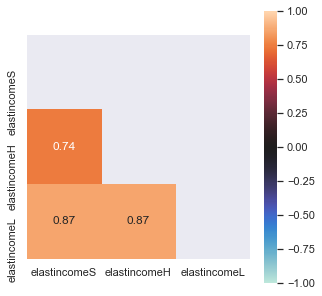

In [34]:
#Correlation1
corr1 = pd.DataFrame(elarst_merged,columns=['elastincomeS', 'elastincomeH', 'elastincomeL'])
corrMatrix1 = corr1.corr()

mask = np.zeros_like(corrMatrix1)
mask[np.triu_indices_from(mask)] = True
fig_heatmap, axs = plt.subplots(figsize=(5, 5))
axs = sns.heatmap(
    corrMatrix1, annot=True, fmt=".2f", vmin=-1, vmax=1, mask=mask, square=True, center=0
)
plt.show()

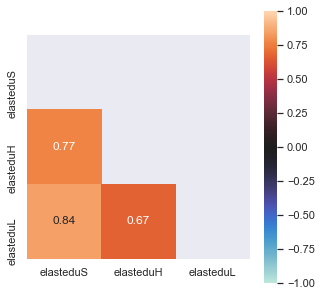

In [35]:
#Correlation2
corr2 = pd.DataFrame(elarst_merged,columns=['elasteduS', 'elasteduH', 'elasteduL'])
corrMatrix2 = corr2.corr()

mask = np.zeros_like(corrMatrix2)
mask[np.triu_indices_from(mask)] = True
fig_heatmap, axs = plt.subplots(figsize=(5, 5))
axs = sns.heatmap(
    corrMatrix2, annot=True, fmt=".2f", vmin=-1, vmax=1, mask=mask, square=True, center=0
)
plt.show()

In [36]:
elarst_merged['sic'] = np.nan

elarst_merged.loc[elarst_merged['ind'] == 1, 'sic'] = 17 
elarst_merged.loc[elarst_merged['ind'] == 2, 'sic'] = 121 
elarst_merged.loc[elarst_merged['ind'] == 3, 'sic'] = 19
elarst_merged.loc[elarst_merged['ind'] == 4, 'sic'] = 18 
elarst_merged.loc[elarst_merged['ind'] == 5, 'sic'] = 121 
elarst_merged.loc[elarst_merged['ind'] == 6, 'sic'] = 22
elarst_merged.loc[elarst_merged['ind'] == 7, 'sic'] = 124 
elarst_merged.loc[elarst_merged['ind'] == 8, 'sic'] = 45
elarst_merged.loc[elarst_merged['ind'] == 9, 'sic'] = 124 
elarst_merged.loc[elarst_merged['ind'] == 10, 'sic'] = 14 

elarst_merged.loc[elarst_merged['ind'] == 11, 'sic'] = 67 
elarst_merged.loc[elarst_merged['ind'] == 12, 'sic'] = 11 
elarst_merged.loc[elarst_merged['ind'] == 13, 'sic'] = 12
elarst_merged.loc[elarst_merged['ind'] == 14, 'sic'] = 13 
elarst_merged.loc[elarst_merged['ind'] == 15, 'sic'] = 6 
elarst_merged.loc[elarst_merged['ind'] == 16, 'sic'] = 86
elarst_merged.loc[elarst_merged['ind'] == 17, 'sic'] = 124 
elarst_merged.loc[elarst_merged['ind'] == 18, 'sic'] = 32
elarst_merged.loc[elarst_merged['ind'] == 19, 'sic'] = 68 
elarst_merged.loc[elarst_merged['ind'] == 20, 'sic'] = 116 

elarst_merged.loc[elarst_merged['ind'] == 21, 'sic'] = 115 
elarst_merged.loc[elarst_merged['ind'] == 22, 'sic'] = 91 
elarst_merged.loc[elarst_merged['ind'] == 23, 'sic'] = 104
elarst_merged.loc[elarst_merged['ind'] == 24, 'sic'] = 92
elarst_merged.loc[elarst_merged['ind'] == 25, 'sic'] = 64
elarst_merged.loc[elarst_merged['ind'] == 26, 'sic'] = 122
elarst_merged.loc[elarst_merged['ind'] == 27, 'sic'] = 6 
elarst_merged.loc[elarst_merged['ind'] == 28, 'sic'] = 95
elarst_merged.loc[elarst_merged['ind'] == 29, 'sic'] = 76 
elarst_merged.loc[elarst_merged['ind'] == 30, 'sic'] = 73 

elarst_merged.loc[elarst_merged['ind'] == 31, 'sic'] = 72
elarst_merged.loc[elarst_merged['ind'] == 32, 'sic'] = 81 
elarst_merged.loc[elarst_merged['ind'] == 33, 'sic'] = 118
elarst_merged.loc[elarst_merged['ind'] == 34, 'sic'] = 119
elarst_merged.loc[elarst_merged['ind'] == 35, 'sic'] = 113 
elarst_merged.loc[elarst_merged['ind'] == 36, 'sic'] = 113
elarst_merged.loc[elarst_merged['ind'] == 37, 'sic'] = 113 
elarst_merged.loc[elarst_merged['ind'] == 38, 'sic'] = 126


In [37]:
skilloecdUS = pd.read_stata('skilloecdUS')
elarst_merged_new = pd.merge(elarst_merged, skilloecdUS, on='sic')

In [38]:
elarst_merged_new['skiloecd2'] = elarst_merged_new['skiloecd'] **2
#elarst_merged_new

In [39]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [47]:
#1st regression function and results
Y = elarst_merged_new["elasteduS"]
X = elarst_merged_new["skiloecd"]
w = elarst_merged_new["meanshS"]
X = sm.add_constant(X)
model = sm.WLS(Y,X,w)
results3 = model.fit()
print(results3.summary()) 

#2nd regression function and results
X = elarst_merged_new[["skiloecd","skiloecd2"]] 
y = elarst_merged_new["elasteduS"]
w = elarst_merged_new["meanshS"]
## fit a WLS model 
X = sm.add_constant(X)
est = sm.WLS(y, X, w).fit()
print(est.summary())

#3rd regression function and results
Y = elarst_merged_new["elasteduL"]
X = elarst_merged_new["skiloecd"]
w = elarst_merged_new["meanshL"]
X = sm.add_constant(X)
model = sm.WLS(Y,X,w)
results3 = model.fit()
print(results3.summary()) 

#4th regression function and results
X = elarst_merged_new[["skiloecd","skiloecd2"]] 
y = elarst_merged_new["elasteduL"]
w = elarst_merged_new["meanshL"]
## fit a WLS model 
X = sm.add_constant(X)
est = sm.WLS(y, X, w).fit()
print(est.summary())

#5th regression function and results
Y = elarst_merged_new["elasteduH"]
X = elarst_merged_new["skiloecd"]
w = elarst_merged_new["meanshH"]
X = sm.add_constant(X)
model = sm.WLS(Y,X,w)
results3 = model.fit()
print(results3.summary()) 

#6th regression function and results
X = elarst_merged_new[["skiloecd","skiloecd2"]] 
y = elarst_merged_new["elasteduH"]
w = elarst_merged_new["meanshH"]
## fit a WLS model 
X = sm.add_constant(X)
est = sm.WLS(y, X, w).fit()
print(est.summary())

                            WLS Regression Results                            
Dep. Variable:              elasteduS   R-squared:                       0.103
Model:                            WLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.152
Date:                Tue, 23 Mar 2021   Prob (F-statistic):             0.0490
Time:                        12:35:28   Log-Likelihood:                 8.5788
No. Observations:                  38   AIC:                            -13.16
Df Residuals:                      36   BIC:                            -9.882
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2014      0.102     -1.982      0.0

In [ ]:
#TABLE3 PANELA

In [46]:
skilloecd = [0.537,-4.052,0.201,-3.584,0.0595,-2.629]
stderr_skilloecd = ['(0.264)','(1.576)','(0.215)','(1.279)', '(0.172)', '(1.037)']
skilloecd2 = ['',5.374,'',4.432,'',3.106]
stderr_skilloecd2 =['','(1.824)','','(1.480)', '', '(1.184)']
Constant = [-0.201,0.721,-0.0753,0.685,-0.0230,0.521]
stderr_cons = ['(0.102)','(0.326)','(0.0827)','(0.265)', '(0.0688)', '(0.217)']
R_squared1 = [0.103,0.282,0.024,0.223,0.003,0.167]

rows = [skilloecd,stderr_skilloecd,skilloecd2,stderr_skilloecd2,Constant,stderr_cons,R_squared1]
index = ["Adj. skill intensity",'',"Adj. skill intensity squared",'',"Constant",'', "R^2"]
 
TABLE3A = pd.DataFrame(data = rows, index=index, columns=['Singles','Singles','Spouse less than college',
                                                     'Spouse less than college','Spouse some college','Spouse some college'])
TABLE3A

,Singles,Singles,Spouse less than college,Spouse less than college,Spouse some college,Spouse some college
Adj. skill intensity,0.537,-4.052,0.201,-3.584,0.0595,-2.629
,(0.264),(1.576),(0.215),(1.279),(0.172),(1.037)
Adj. skill intensity squared,,5.374,,4.432,,3.106
,,(1.824),,(1.480),,(1.184)
Constant,-0.201,0.721,-0.0753,0.685,-0.023,0.521
,(0.102),(0.326),(0.0827),(0.265),(0.0688),(0.217)
R^2,0.103,0.282,0.024,0.223,0.003,0.167
